# Universal Pleasantness

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.2)
import univple as up

### Load the data and show the ranking for each odorant

In [2]:
data_raw, odorants = up.load_data()
data_raw.head()  # First 5 rows

OdorName               1-Octen-3-ol  2-Isobutyl-3-methoxypyrazine  \
Group     Participant                                               
Cha'palaa 1                      10                             6   
          2                       5                             4   
          3                       7                             8   
          4                       7                            10   
          5                       6                            10   

OdorName               2-Phenylethanol  Diethyl disulfide  Ethyl butyrate  \
Group     Participant                                                       
Cha'palaa 1                          2                  8               4   
          2                          2                  3               8   
          3                          1                 10               5   
          4                          3                  4               9   
          5                          2                  8               5   

OdorName               Eugenol  Isovaleric acid  Linalool  Octanoic acid  \
Group     Participant                                                      
Cha'palaa 1                  3                7         1              9   
          2                  1                6         9             10   
          3                  4                3         6              9   
          4                  1                8         6              5   
          5                  3                7         1              9   

OdorName               Vanillin  
Group     Participant            
Cha'palaa 1                   5  
          2                   7  
          3                   2  
          4                   2  
          5                   4

### For modeling purposes, switch this to the odor index for rank 1, for rank 2, etc. for each subject

In [3]:
data, odorants = up.load_data(by='ranks')
groups, group_ids = up.get_groups(data)
data.head()  # First 5 rows

1st  2nd  3rd  4th  5th  6th  7th  8th  9th  10th
Group     Participant                                                   
Cha'palaa 1              8    3    6    5   10    2    7    4    9     1
          2              6    3    4    2    1    7   10    5    8     9
          3              3   10    7    6    5    8    1    2    9     4
          4              6   10    3    4    9    8    1    7    5     2
          5              8    3    6   10    5    1    7    4    9     2

### Make a counterfactual dataset under a different hypothesis: there is no universal pleasantness
Create a unique ranking shuffle for each group and apply each group's shuffle identically to the members of that group

In [4]:
data_groupshuffle = up.shuffle_data(data, groups, how='group-shuffle')
data_groupshuffle.head()

1st  2nd  3rd  4th  5th  6th  7th  8th  9th  10th
Group     Participant                                                   
Cha'palaa 1              7    8   10    4    1    2    6    5    9     3
          2             10    6    1    5    9    7    4    2    8     3
          3              1    3    5    2    4    8    7    6    9    10
          4              1    6    9    7    2    8    3    4    5    10
          5              7    8    5    4    2    1    6   10    9     3

### The model in Stan (a probabilistic programming language for fitting Bayesian models)

In [5]:
# Compile the model
model = up.load_or_compile_stan_model('univple')

### Fit the model for the real data

In [6]:
# Fit takes a long time so here we will be just load what has already been fit

#%time fit, samples = fit_model(model, data, warmup=5000, iter=20000)
#samples.to_csv('samples.csv') # Save the fitted samples
#fit  # Show summary statistics of the fit

samples = pd.read_csv('samples.csv', index_col=0)
samples.head()

,chain,draw,warmup,mu_global[1],mu_global[2],mu_global[3],mu_global[4],mu_global[5],mu_global[6],mu_global[7],...,sigma_ind[9],sigma_ind[10],mu_mean,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,-0.214257,-1.994278,0.764622,-2.317786,2.748898,1.095692,-3.705234,...,1.808654,1.243677,0.000322,-5830.458295,0.992152,0.005768,9,511,0,7368.187791
1,0,1,0,-0.564173,-2.047324,0.916418,-2.269875,3.246671,1.010076,-3.449383,...,1.475309,1.175408,-0.000183,-5825.621911,0.999465,0.005768,9,511,0,7322.417566
2,0,2,0,-0.381757,-1.614097,0.814165,-2.358901,2.918037,0.964967,-3.438699,...,1.662034,1.192037,0.000426,-5816.963683,0.971262,0.005768,9,511,0,7305.597346
3,0,3,0,-0.703732,-1.817054,1.370934,-1.976487,2.871827,0.890261,-3.715672,...,1.698766,1.143987,0.000009,-5815.934759,0.998203,0.005768,9,511,0,7255.971249
4,0,4,0,-0.714996,-1.404622,1.267393,-2.128519,3.164830,0.974352,-4.059915,...,1.585219,1.104545,-0.001370,-5859.361199,0.886503,0.005768,9,511,0,7296.863272


### Fit the model for the shuffled data

In [7]:
# Fit takes a long time so here we will be just load what has already been fit

#%time fit_groupshuffle, samples_groupshuffle = fit_model(model, data_groupshuffle, warmup=5000, iter=20000)
#samples_groupshuffle.to_csv('samples_group-shuffle.csv')  # Save the fitted samples
#fit_groupshuffle  # Show summary statistics of the fit

samples_group_shuffle = pd.read_csv('samples-group-shuffle.csv', index_col=0)
samples_group_shuffle.head()

,chain,draw,warmup,mu_global[1],mu_global[2],mu_global[3],mu_global[4],mu_global[5],mu_global[6],mu_global[7],...,sigma_ind[9],sigma_ind[10],mu_mean,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,0.017788,-0.004127,0.032087,-0.015254,0.009871,-0.018424,-0.009347,...,5.054964,8.235879,0.000398,-7094.334903,0.995975,0.004439,10,1023,0,8561.176825
1,0,1,0,0.038446,-0.001120,0.020362,-0.023302,0.010004,-0.001203,0.011102,...,5.367608,8.534826,-0.000424,-7042.696154,0.999473,0.004439,10,1023,0,8515.572359
2,0,2,0,0.020422,-0.016229,0.001139,-0.006350,0.009538,-0.000842,0.014317,...,5.092599,8.319162,0.001524,-7088.238044,0.989157,0.004439,10,1023,0,8557.117683
3,0,3,0,-0.009748,0.008475,-0.004055,0.016699,-0.023115,0.016084,-0.002403,...,4.655347,8.169385,0.001238,-7088.401930,0.998159,0.004439,10,1023,0,8523.277238
4,0,4,0,-0.005285,0.010399,0.013758,-0.009001,-0.005953,0.003046,-0.007868,...,4.395616,9.004051,-0.001563,-7105.443510,0.998316,0.004439,10,1023,0,8525.103866


### First, check if independent sampling chains (runs with different random starting points) agree on global odorant valences

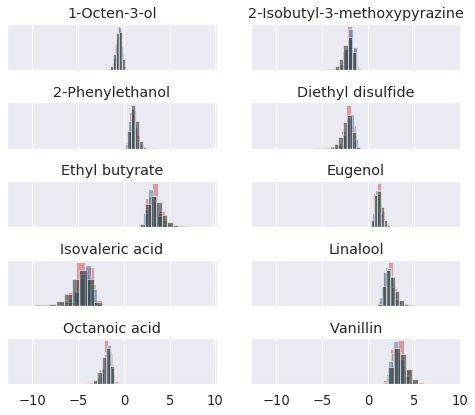

In [8]:
# If each odorant produces 4 almost perfectly overlapping histograms,
# then the fit went well
up.plot_global_agreement(samples, odorants)

### Check that the estimated valences and the observed ranks are almost perfectly anti-correlated at the individual level (i.e. a high valence is a low (e.g. 1) rank

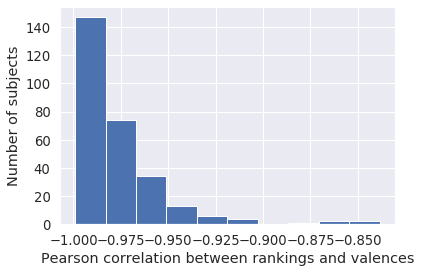

In [9]:
# Distribution of individual-level Pearson Correlation between observed rankings
# and estimated latent valences.  Should be close to -1
# (since lower ranking is more pleasant, but higher rating is more pleasant).
# Differs from exactly -1 due to a) the switch between a cardinal and ordinal measure
# and b) the denoising applied by the model
up.ranks_vs_values(samples, groups)

### Show how the group mean valences for each odorant compare.  Order by global mean valence.

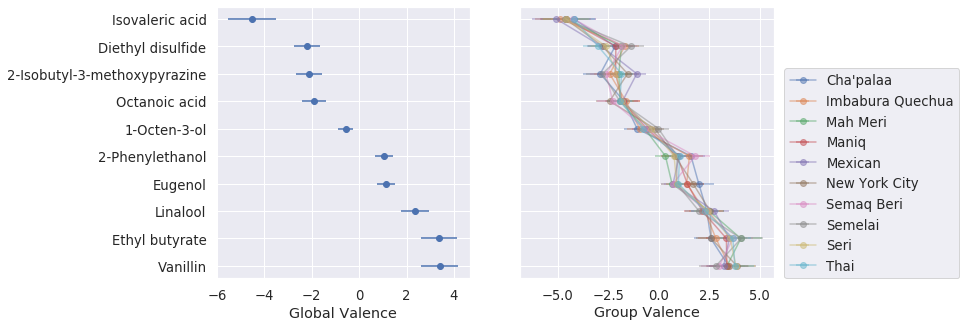

In [10]:
up.plot_global_means(groups, odorants, samples)

### What is the contribution of global variability (across odorants)? Of group variability? Of individual variability?

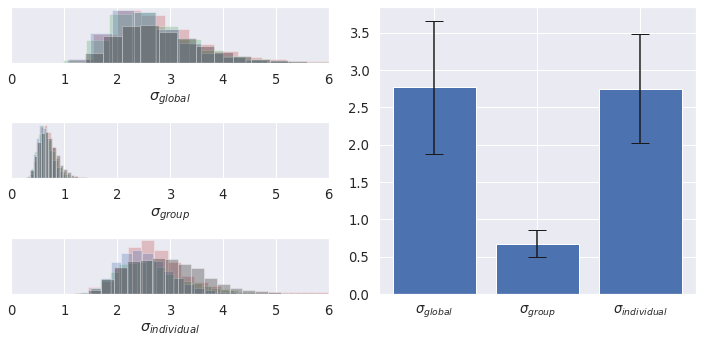

In [11]:
up.plot_sigmas(samples, groups)

### Verify that when the model is applied to the shuffled ranks, the contribution of global valence disappears

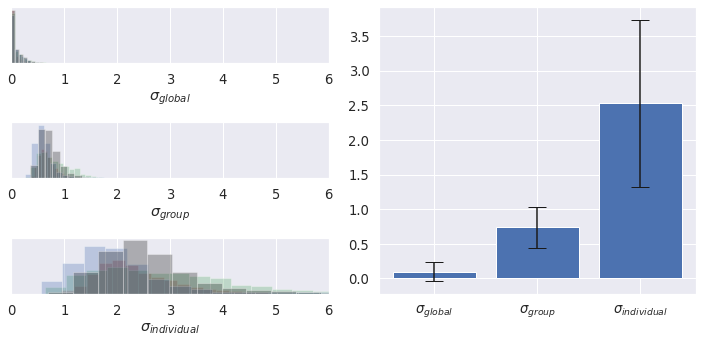

In [12]:
up.plot_sigmas(samples_group_shuffle, groups)

### Valences are very highly correlated across groups (different groups ranks things similarly), but odorants are not really correlated with one another (how a group ranks one odorant does not closely predict how it will rank another odorant)

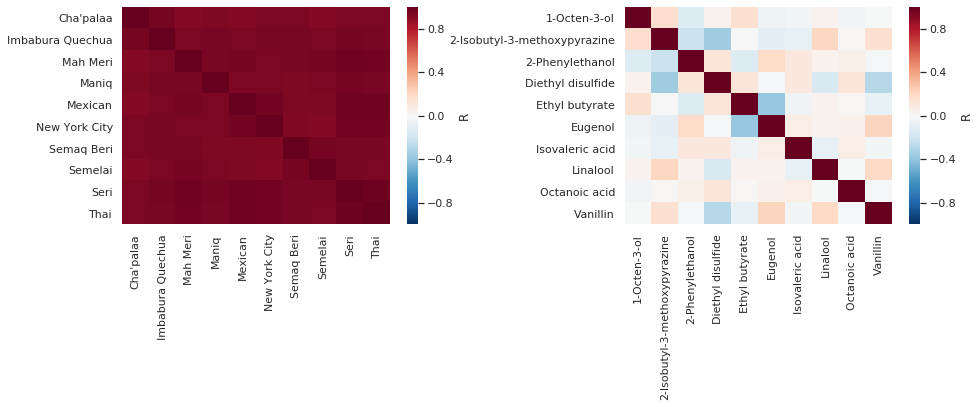

In [13]:
up.corr_heatmaps(samples, groups, odorants)

### For the shuffle control, this correlation structure (among groups) disappears

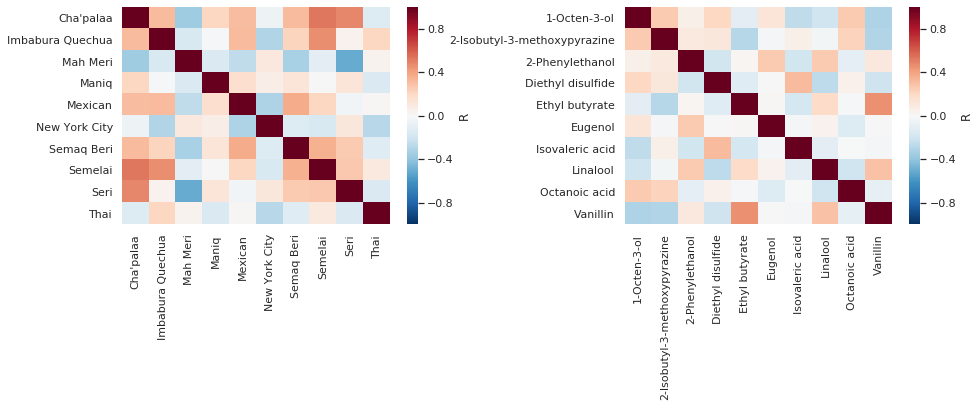

In [14]:
up.corr_heatmaps(samples_group_shuffle, groups, odorants)

### PCA shows that there is really only one principal component explaining most of the variance in cross-cultural odor ranking.  Operating in the other direction, on odorants, shows a higher-dimensional structure (recapitulates the point in the figures above).

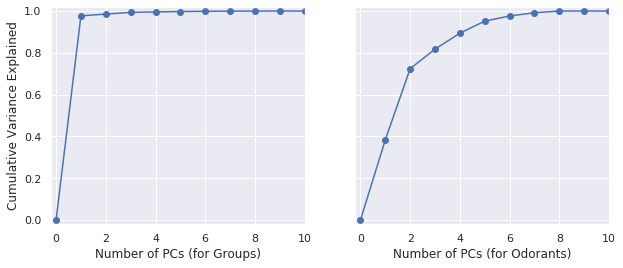

In [15]:
up.plot_var_explained(samples, groups, odorants)

### The model estimates the intra-group standard deviations

In [16]:
# Individual variability within a group
intragroup_std = pd.Series([samples['sigma_ind[%d]' % x].mean() for x in range(1, len(groups)+1)], index=groups)
intragroup_std.sort_values().to_frame(name='Standard Deviation across Individuals').round(1)

,Standard Deviation across Individuals
Mexican,1.7
Thai,1.7
Seri,2.0
Mah Meri,2.4
Semelai,2.6
New York City,2.8
Imbabura Quechua,3.5
Cha'palaa,3.6
Semaq Beri,3.9
Maniq,17.8


### We can examine this more closely for each group, looking at the correlation in estimated odorant valences between individuals.  This shows that the Maniq are ranking in a way which is indistinguishable from random (red dashed line, KS-test p-value shown)

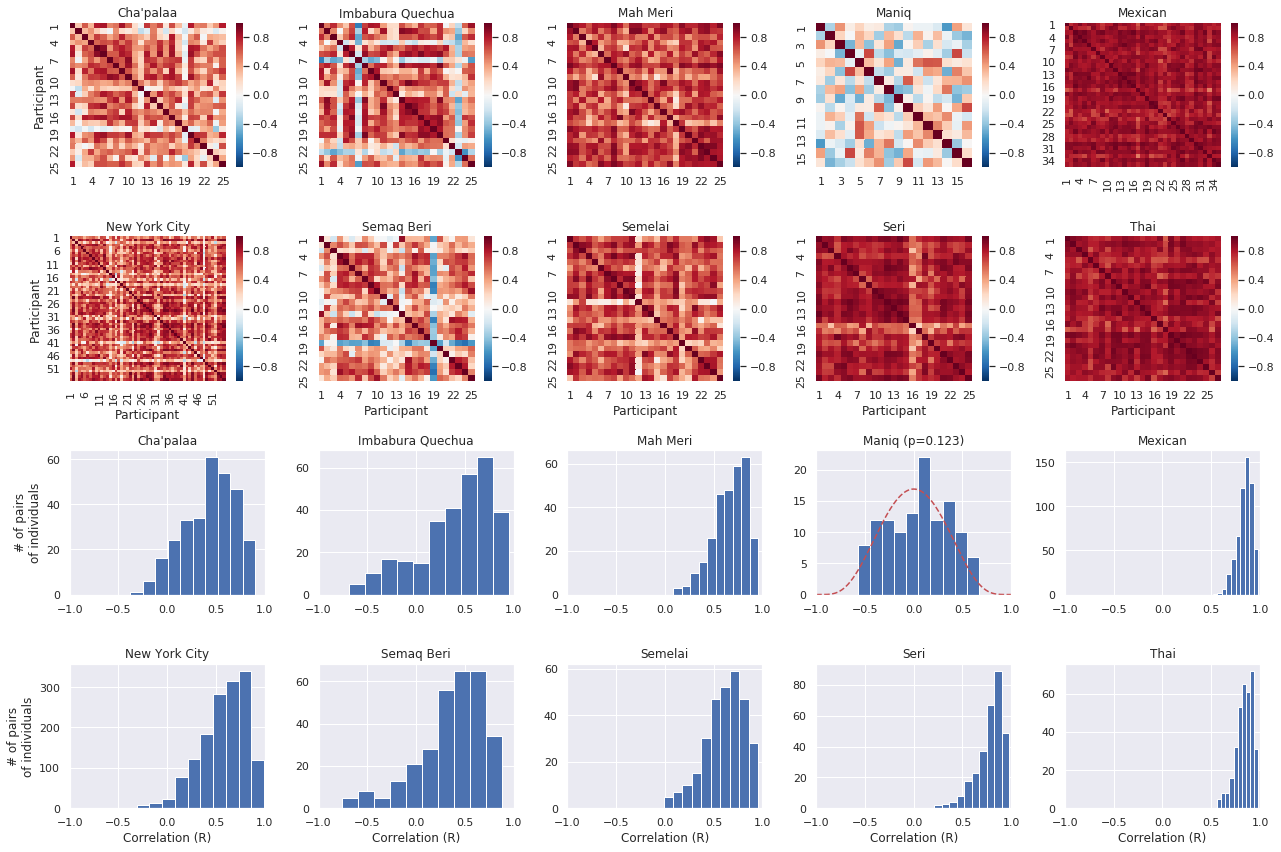

In [46]:
up.plot_ind_corrs(data, samples, groups, odorants)

### We can look at the groups in a reduced dimension using PCA (big dots are group means, little dots are individuals; many individuals are far away from the mean, illustrating that individual variability (and noise) is large compared to the differences between groups.

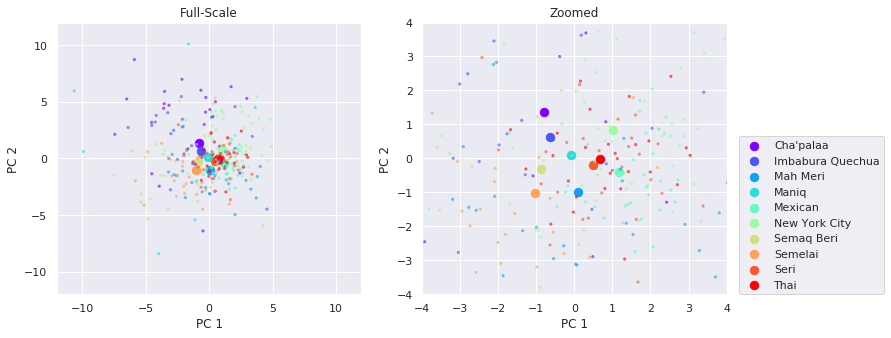

In [18]:
up.plot_all_individuals(samples, groups, group_ids, odorants)

### We can then partition the groups into supergroups and ask if these supergroups explain the observed group structure

In [19]:
supergroups = {'subsistence': {'Industrial': ['New York City', 'Thai', 'Mexican'],
                               'Agricultural': ['Semelai', 'Mah Meri', "Cha'palaa", 'Imbabura Quechua'],
                               'Hunter-gatherer': ['Maniq', 'Semaq Beri', 'Seri']},
               'geography': {'North America': ['New York City', 'Seri', 'Mexican'],
                             'South America': ["Cha'palaa", 'Imbabura Quechua'],
                              'Asia': ['Semelai', 'Mah Meri', 'Maniq', 'Semaq Beri', 'Thai']}}

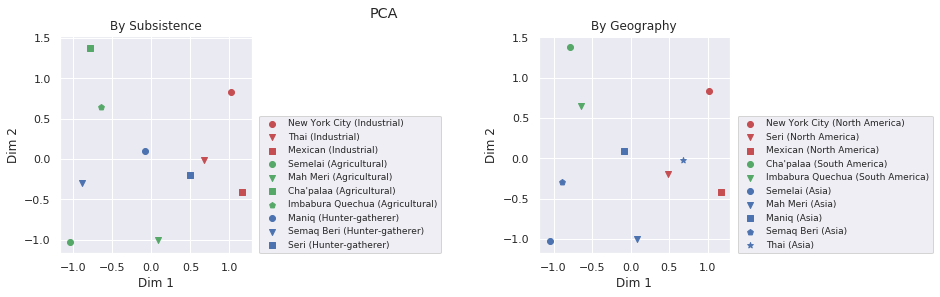

In [20]:
# Plot using PCA as above
up.plot_supergroups(samples, groups, odorants, supergroups, method='PCA')

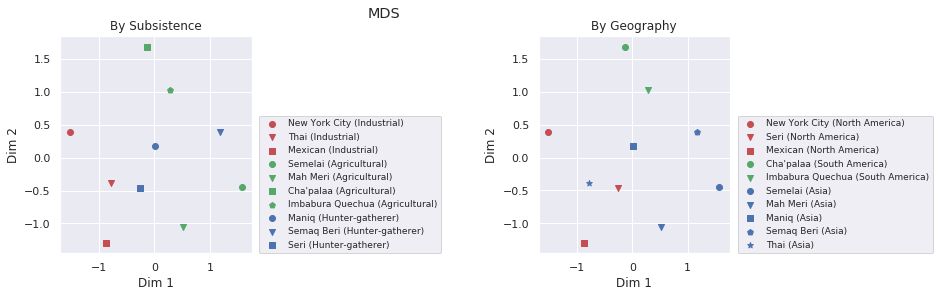

In [21]:
# Plot using Multidimensional Scaling, another dimensionality reduction strategy
up.plot_supergroups(samples, groups, odorants, supergroups, method='MDS')

### We next ask whether certain supergroups summarize the group structure.  We compare these groups to random group assignments of the same size to get p-values

In [23]:
supergroup_stats = up.get_supergroup_stats(samples, groups, odorants, supergroups)
supergroup_stats.to_frame(name='p')

,p
subsistence,0.1661
geography,0.0018
